TREINAMENTO DO MODELO DE DETECÇÃO DE LETRAS EM LIBAS

In [59]:
# IMPORT
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [60]:
# Parâmetros
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32
BATCH_SIZE = 32
EPOCHS = 20
DATASET_DIR = "../dataset"

# Gerador de dados
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

# Dados de treino
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

# Dados de validação
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation'
)

# Mapeamento das classes (letras)
class_indices = train_generator.class_indices
print("Mapeamento das classes:", class_indices)

Found 5919 images belonging to 21 classes.
Found 1472 images belonging to 21 classes.
Mapeamento das classes: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'i': 7, 'l': 8, 'm': 9, 'n': 10, 'o': 11, 'p': 12, 'q': 13, 'r': 14, 's': 15, 't': 16, 'u': 17, 'v': 18, 'w': 19, 'y': 20}


In [61]:
# Salvar mapeamento para uso posterior
import json
with open('../models/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [62]:
# Modelo CNN simples
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,141 (1.21 MB)

 Trainable params: 317,141 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4608 - loss: 1.8515 - val_accuracy: 0.8499 - val_loss: 0.4754
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9013 - loss: 0.3734 - val_accuracy: 0.8723 - val_loss: 0.3513
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9277 - loss: 0.2533 - val_accuracy: 0.8974 - val_loss: 0.3198
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9486 - loss: 0.1799 - val_accuracy: 0.8845 - val_loss: 0.3529
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9616 - loss: 0.1217 - val_accuracy: 0.9096 - val_loss: 0.2437
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9710 - loss: 0.1029 - val_accuracy: 0.9083 - val_loss: 0.2964
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9783 - loss: 0.0775 - val_accuracy: 0.9348 - val_loss: 0.2280
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9757 - loss: 0.0828 - val_accu

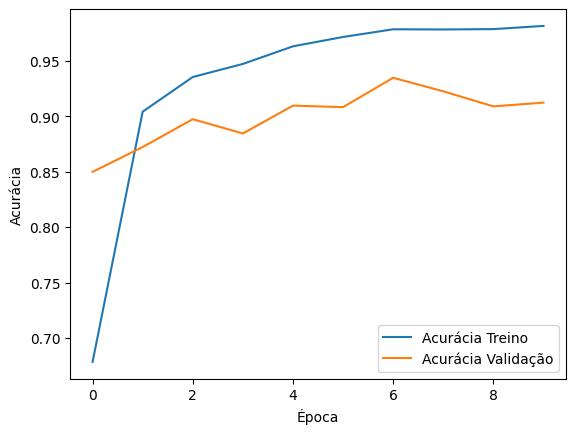

In [63]:
# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Plot dos resultados
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [64]:
# Salva o modelo treinado
model.save('../models/asl_gesture_model2.h5')
print("Modelo salvo como 'asl_gesture_model2.h5'")

Modelo salvo como 'asl_gesture_model2.h5'
